In [1]:
import numpy as np
import tensorflow as tf
import os

In [2]:
import matplotlib.pyplot as plt
import _pickle
import time

In [3]:
# todo
# compare likelihoods
# test with less popular features
# use different priors
# multiclass logistic regression significance tests
# fit mixture of gaussian vs gaussian
# check if weight activity killed
# tansfer learning for new class and robustness

In [4]:

file = open('mean.pkl', "rb")
gaussian_means = _pickle.load(file) 
file = open('covariance.pkl', "rb")
gaussian_covariances = _pickle.load(file)

with open('test_set_17_227.pkl', "rb") as handle:
    test_set = _pickle.load(handle) 
    
with open('new turker count.pkl', "rb") as handle:
    turker_count= _pickle.load(handle) 

In [5]:
bad_samples = {2:{}, 
               3:{'Matt Damon':[1]}, 
               4:{'Matt Damon':[1], 'Cheryl Hines': [11]},
               5:{'Matt Damon':[1, 10]},
               6:{},
               7:{'Alec Baldwin':[3, 8], 'Kristin Chenoweth':[0]},
               8:{},
               9:{'Angie Harmon': [1]},
               10:{'Matt Damon':[1]},
               11:{}
              }

In [6]:
male_actors = ['Daniel Radcliffe', 'Gerard Butler', 'Michael Vartan', 'Alec Baldwin', 'Steve Carell',\
                    'Bill Hader', 'Fran Drescher', 'Matt Damon', 'Nicolas Cage']
female_actors = ['Cheryl Hines', 'Selena Gomez', 'Angie Harmon', 'Lorraine Bracco', 'Kristin Chenoweth',\
                      'America Ferrera', 'Anne Hathaway', 'Jennifer Aniston']
gender ={}
for actor in male_actors:
    gender[actor] = 'male'
for actor in female_actors:
    gender[actor] = 'female' 

In [7]:
# creating turker count per actor
features = ['beard', 'eye brows', 'eyes', 'hairline', 'lips', 'moustache', 'nose']
features = ['eye brows', 'eyes', 'lips', 'nose', 'cheek', 'moustache', 'beard']
# features = ['beard', 'eye brows', 'eyes', 'lips', 'moustache', 'nose']
actor_stats = {}
for actor in test_set:
    actor_stats[actor] = {}
    for feature in features:
        actor_stats[actor][feature] = 0  
#     for stats in turker_count[actor]:
#         for feature in features:
#             try:
#                  actor_stats[actor][feature] += stats[feature]
#             except:
#                 continue
                
    stats = turker_count[actor]
    for feature in features:
        try:
             actor_stats[actor][feature] += stats[feature]
        except:
            continue

actor_stats_normalized = {}
for actor in actor_stats:
    actor_stats_normalized[actor] = {}
    total_count = sum(actor_stats[actor].values())
    for feature in features:
        actor_stats_normalized[actor][feature] = actor_stats[actor][feature]/total_count

In [8]:
average_turker_stats = {}
for feature in features:
    all_stats = [actor_stats_normalized[actor][feature] for actor in test_set.keys()]
    average_turker_stats[feature] = sum(all_stats)/len(all_stats)

In [9]:
turker_deviations = {}
for actor in actor_stats_normalized:
    turker_deviations[actor]={}
    for feature in features:
        turker_deviations[actor][feature] = actor_stats_normalized[actor][feature]/average_turker_stats[feature]
        

In [10]:
cheek_means = np.array([[  31.79099188,   44.03019907,  179.05808285,  125.29154893],
       [  57.22106299,   41.57655522,   61.30366513,  147.5414004 ],
       [  54.1436423 ,   50.71881594,  171.97807947,  145.65161117],
       [  35.44848876,   94.99750046,  125.23394325,  198.92610345],
       [  26.87438318,  103.32428728,  124.9740062 ,   47.5209629 ]])
cheek_cov = np.array([[[   50.4098295 ,    -2.54555092,   -26.52315674,    -7.05169067],
        [   -2.54555092,   106.18260467,   -48.16761971,   171.18817079],
        [  -26.52315674,   -48.16761971,   164.24905824,  -130.23300634],
        [   -7.05169067,   171.18817079,  -130.23300634,   476.64600845]],

       [[  150.08923247,    71.41854496,   -74.69413869,   129.76354707],
        [   71.41854496,   173.05403336,   -13.84353935,    56.45516305],
        [  -74.69413869,   -13.84353935,   485.38722654,    68.46522175],
        [  129.76354707,    56.45516305,    68.46522175,   647.06361566]],

       [[  212.60371597,    36.30508322,    44.46058845,    62.24956246],
        [   36.30508322,   253.83843074,    99.65980524,  -111.45764165],
        [   44.46058845,    99.65980524,   170.03833204,   -40.88283381],
        [   62.24956246,  -111.45764165,   -40.88283381,   198.48454792]],

       [[  240.1024427 ,   332.33674682,   -41.4262359 ,  -127.9679767 ],
        [  332.33674682,  1091.33973699,   -54.3259853 ,  -210.01129735],
        [  -41.4262359 ,   -54.3259853 ,   268.3029234 ,    -8.21242212],
        [ -127.9679767 ,  -210.01129735,    -8.21242212,   302.38006921]],

       [[  128.51721988,   -86.15191969,    69.4475796 ,   399.5794302 ],
        [  -86.15191969,   900.27677083,  -136.73823722,  -373.05072392],
        [   69.4475796 ,  -136.73823722,   285.73456038,   247.59611427],
        [  399.5794302 ,  -373.05072392,   247.59611427,  1897.29380999]]])
cheek_mc = np.array([ 0.12509504,  0.14239342,  0.59940383,  0.11553578,  0.01757193])

In [11]:
np.random.seed(42)
def generate_rectangles(means, covariances):
    mc_samples = {}
    for feature in features:
        print(feature)
        if feature == 'cheek':
            mxr = np.random.choice(5, p = cheek_mc)
            f_means = cheek_means[mxr]
            f_cov = cheek_cov[mxr]
        else:
            f_means = means[feature]
            f_cov = covariances[feature]
        rectangles = []
        while len(rectangles) < 100:
            width, height, y_centre, x_centre = np.random.multivariate_normal(f_means, f_cov)
            x_0= int(np.round(x_centre - width/2)) 
            x_1= int(np.round(x_centre + width/2)) 
            y_0= int(np.round(226 - y_centre - height/2)) 
            y_1= int(np.round(226 - y_centre + height/2)) 
            
            if 0<= x_0 < x_1 <=226 and 0<= y_0 < y_1 <=226:
                rectangles.append(np.array([x_0,x_1,y_0,y_1]))
                
        mc_samples[feature] = np.stack(rectangles)
        
    return mc_samples
mc_rectangle_samples = generate_rectangles(gaussian_means, gaussian_covariances)

eye brows
eyes
lips
nose
cheek
moustache
beard


In [12]:
# # monte carlo rectangles generation
# def generate_rectangles(means, covariances):
#     mc_samples = {}
#     for feature in features:
# #         print(feature)
#         rectangles = []
#         while len(rectangles) < 100:
# #             print(len(rectangles))
#             width, height, y_centre, x_centre = np.random.multivariate_normal(means[feature], \
#                                                                               covariances[feature])
#             x_0= int(np.round(x_centre - width/2)) 
#             x_1= int(np.round(x_centre + width/2)) 
#             y_0= int(np.round(226 - y_centre - height/2)) 
#             y_1= int(np.round(226 - y_centre + height/2)) 
            
# #             x_0= int(np.round(x_centre - height/2)) 
# #             x_1= int(np.round(x_centre + height/2)) 
# #             y_0= int(np.round(y_centre - width/2)) 
# #             y_1= int(np.round(y_centre + width/2)) 
            
# #             print(np.array([x_centre, y_centre, height, width]))
# #             print(np.array([x_0,x_1,y_0,y_1]))
#             if 0<= x_0 < x_1 <=226 and 0<= y_0 < y_1 <=226:
#                 rectangles.append(np.array([x_0,x_1,y_0,y_1]))
                
#         mc_samples[feature] = np.stack(rectangles)
        
#     return mc_samples 

# mc_rectangle_samples = generate_rectangles(gaussian_means, gaussian_covariances)

In [13]:
def score(feature, rectangles, saliency_map):
    intensity_ratio_sum = 0
    for rec in rectangles[feature]:
        highlight = saliency_map[rec[2]:rec[3], rec[0]:rec[1]]
        area = (rec[3]-rec[2])*(rec[1]-rec[0])
        intensity_ratio = (np.sum(highlight))/np.sum(saliency_map)
        intensity_ratio_sum += intensity_ratio
    return intensity_ratio_sum/len(rectangles[feature])

trial 2 #############################################
eye brows


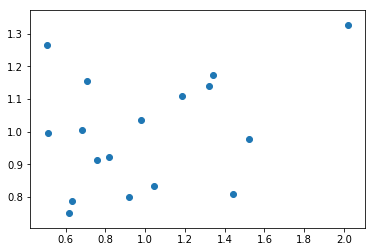

(0.34396259303857579, 0.17642195910872616)
eyes


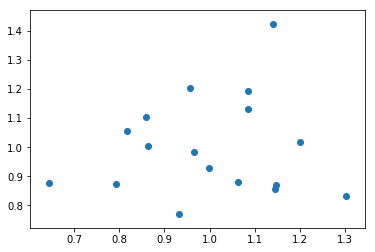

(0.094327752081787369, 0.71876968287720744)
lips


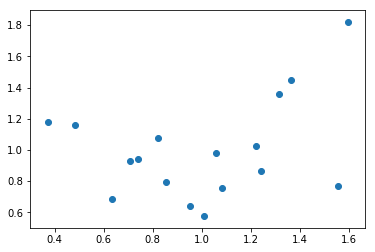

(0.31258552430556469, 0.221875644922399)
nose


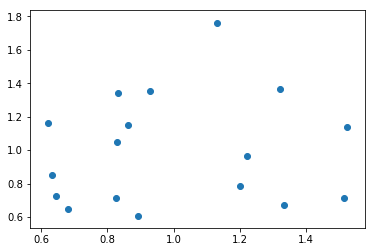

(0.10102198876683553, 0.699654284022456)
cheek


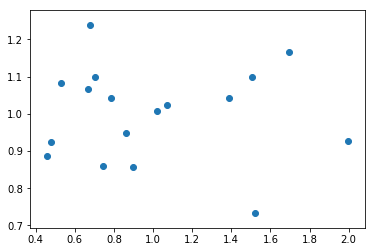

(-0.051379638120131854, 0.84473859753010694)
moustache


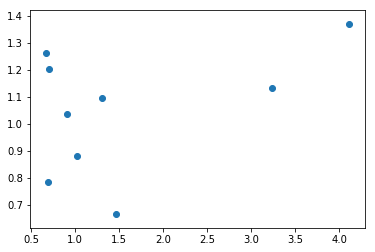

(0.43115069714035853, 0.24660374545475439)
beard


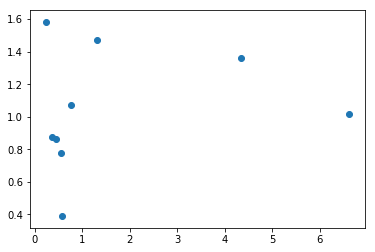

(0.18222984907798115, 0.6388847301151015)
trial 3 #############################################
eye brows


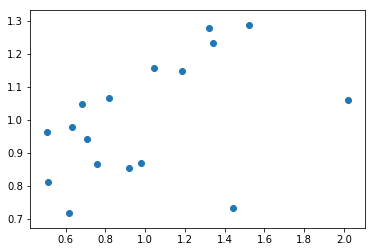

(0.46221413081176893, 0.061761535626328606)
eyes


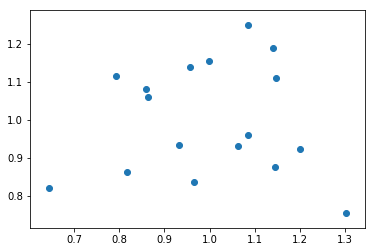

(-0.0047200035447041043, 0.98565587223880891)
lips


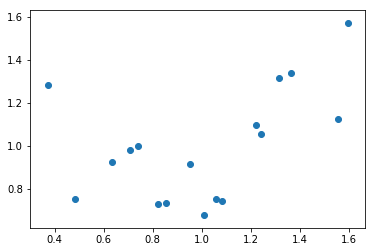

(0.47266497441575406, 0.055364014942797989)
nose


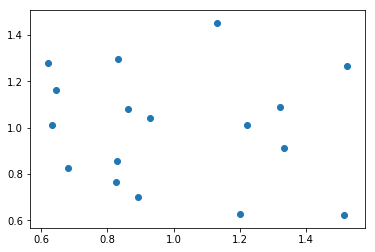

(-0.12322144799017522, 0.63752710602132034)
cheek


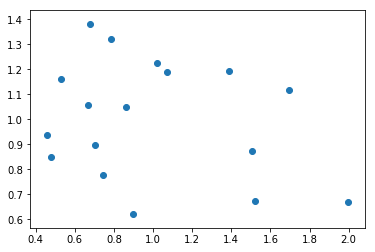

(-0.25751085853175182, 0.31836030869857102)
moustache


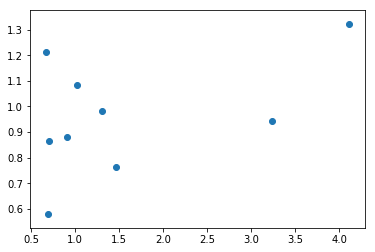

(0.47962123462464351, 0.19138102278675648)
beard


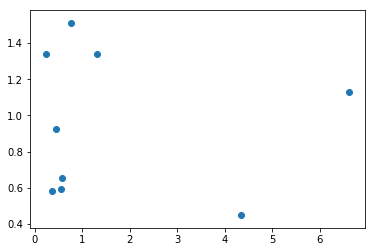

(-0.061992817362418587, 0.87411302794128098)
trial 4 #############################################
eye brows


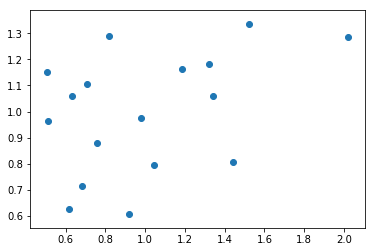

(0.39872823696491555, 0.11288686116609541)
eyes


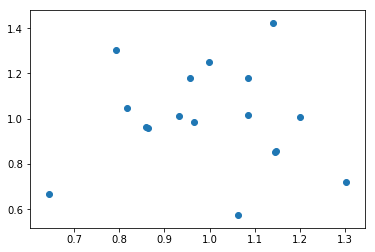

(-0.044928633174014576, 0.86405014888629561)
lips


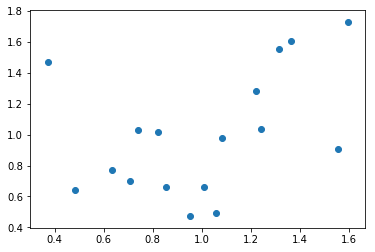

(0.41313218849089089, 0.099303389173319809)
nose


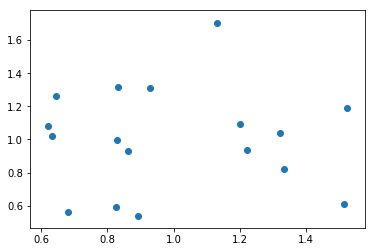

(0.0084842246325641038, 0.97421915122597857)
cheek


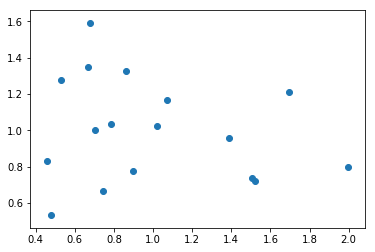

(-0.18158787320349717, 0.48548338602129026)
moustache


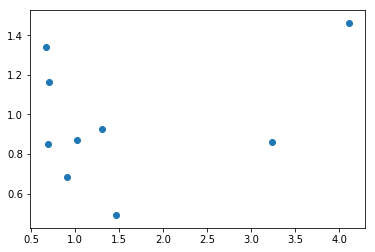

(0.31805680007125536, 0.40422518544515429)
beard


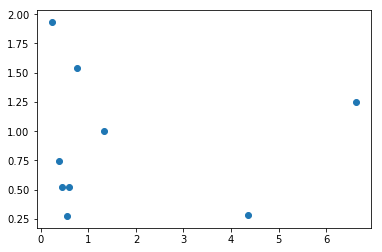

(-0.024490346326192243, 0.95013360581240991)
trial 5 #############################################
eye brows


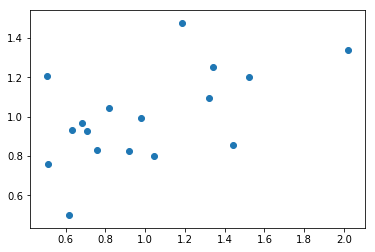

(0.55154752292206899, 0.021724439721067131)
eyes


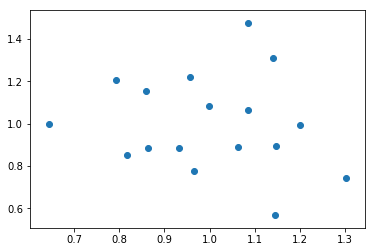

(-0.14621025093856743, 0.57551643566072286)
lips


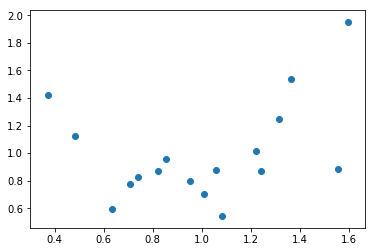

(0.32602218645261211, 0.20157575229611727)
nose


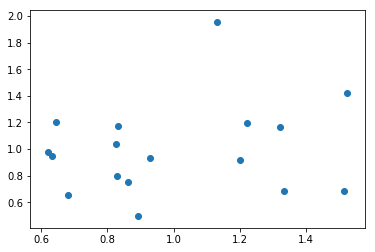

(0.18608119919793356, 0.47456225515411676)
cheek


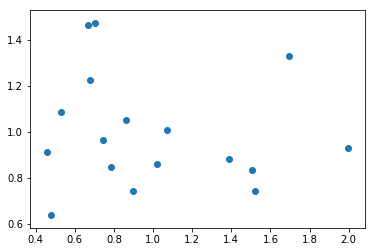

(-0.12057462484634106, 0.64482530158513685)
moustache


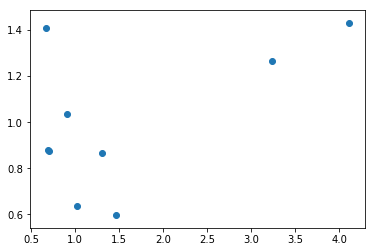

(0.52979101624642122, 0.14237305280798046)
beard


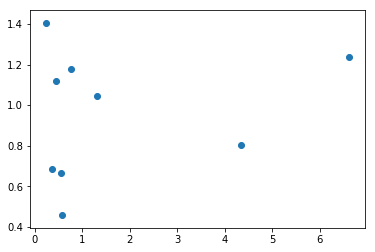

(0.19776904677469848, 0.61000994496960992)
trial 6 #############################################
eye brows


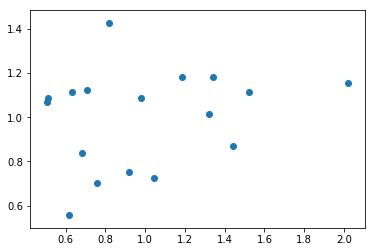

(0.21683773806320492, 0.40317744376557962)
eyes


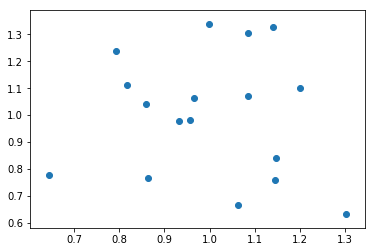

(-0.092384499912027379, 0.72434886535918275)
lips


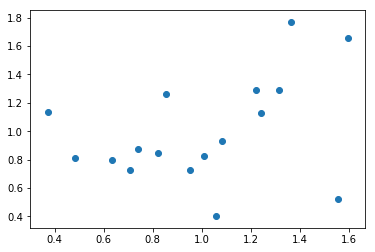

(0.35640840595091233, 0.16026026750138114)
nose


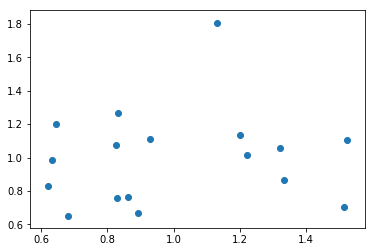

(0.11780986042937715, 0.65248157128668793)
cheek


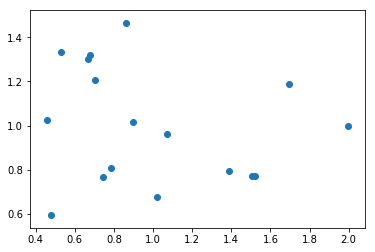

(-0.19925500824880496, 0.44325421506545193)
moustache


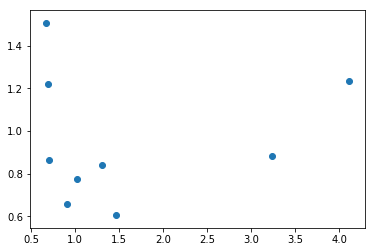

(0.10034582516554359, 0.79728472691368713)
beard


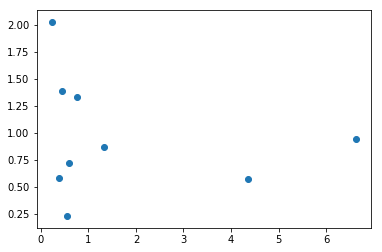

(-0.19541821569680792, 0.61434960751912338)
trial 7 #############################################
eye brows


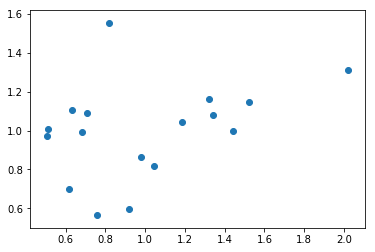

(0.34577241819022042, 0.1740067986231105)
eyes


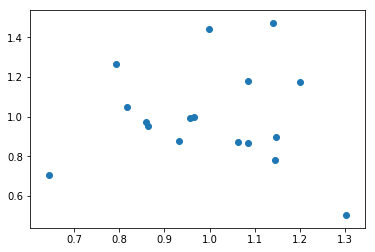

(-0.060200745124200539, 0.81846872344313126)
lips


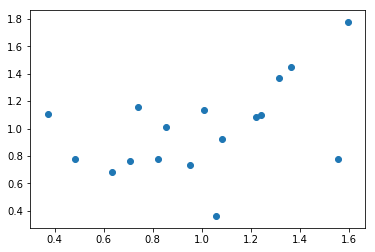

(0.45203764644867461, 0.068501918665192493)
nose


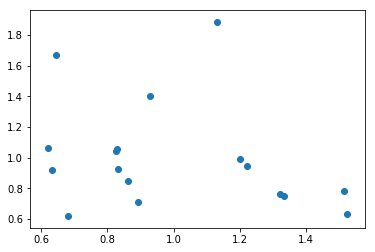

(-0.26609735449472599, 0.30191173088209405)
cheek


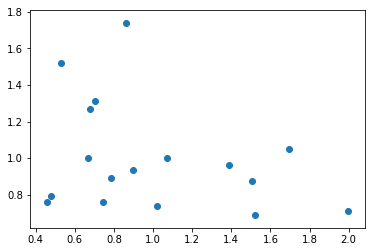

(-0.318389039727621, 0.21295309544771304)
moustache


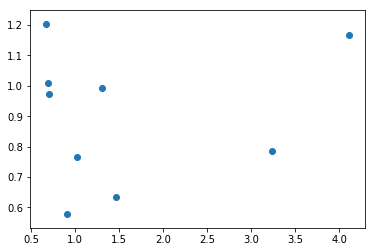

(0.15589687571768543, 0.68877157222343777)
beard


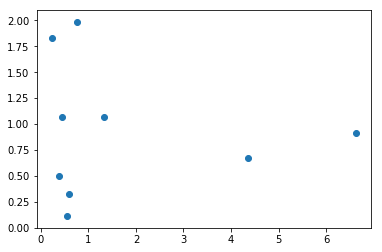

(-0.097357652442743886, 0.80322454820237432)
trial 8 #############################################
eye brows


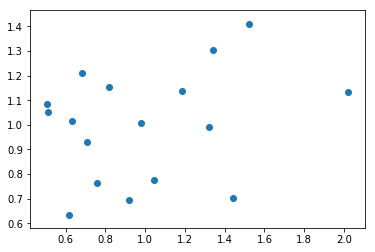

(0.27441856649629776, 0.28646504119835142)
eyes


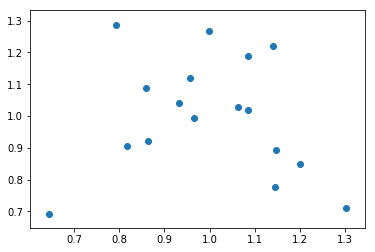

(-0.11768986605196367, 0.65281461406076913)
lips


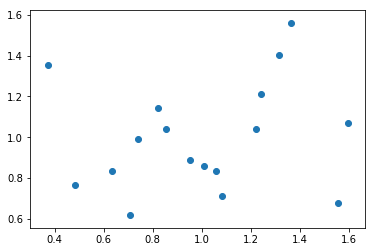

(0.17368516377853019, 0.50498215039103378)
nose


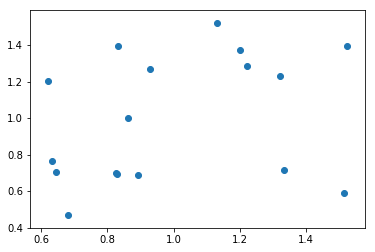

(0.30656431677947177, 0.23138263073709553)
cheek


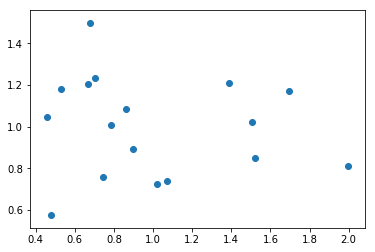

(-0.11807433173969675, 0.65174775394096307)
moustache


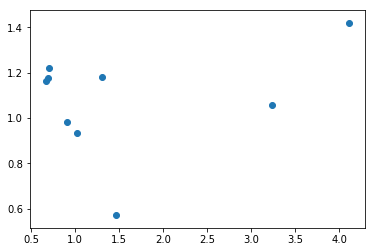

(0.30289191555639799, 0.42820252112347296)
beard


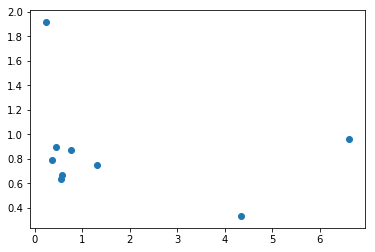

(-0.24332091240321632, 0.52811985852800913)
trial 9 #############################################
eye brows


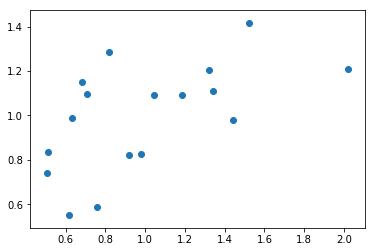

(0.57072525404855845, 0.016729048772720974)
eyes


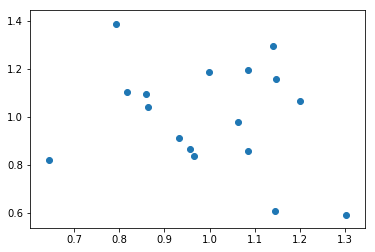

(-0.22711583005146954, 0.38068612762690451)
lips


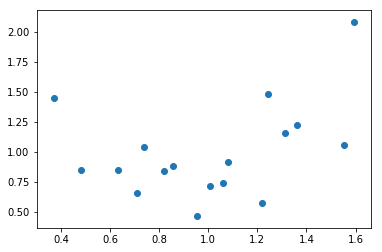

(0.3629542958889887, 0.15217591534010511)
nose


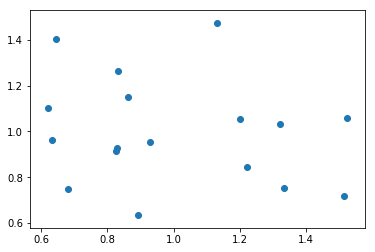

(-0.20316775251779434, 0.43416417639601312)
cheek


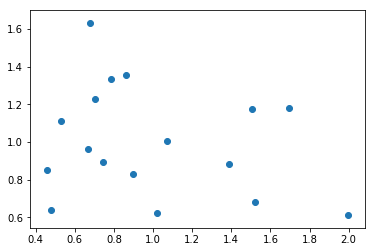

(-0.23748348978221154, 0.35871633482037868)
moustache


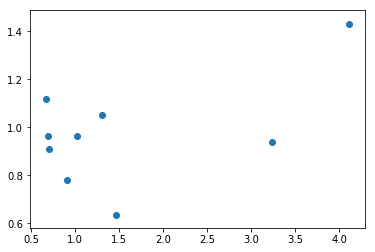

(0.53686211427143715, 0.13613372900446874)
beard


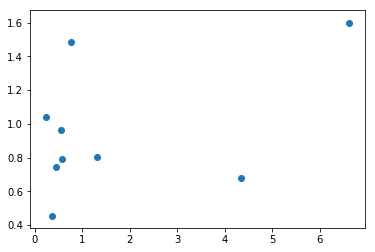

(0.44149149757291095, 0.23417895600431482)
trial 10 #############################################
eye brows


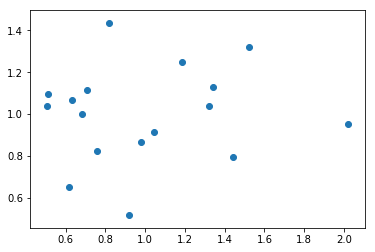

(0.091740115680278858, 0.72620184271468924)
eyes


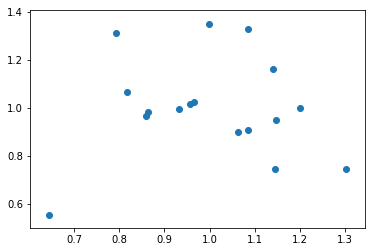

(0.0021500098760073986, 0.99346585318655922)
lips


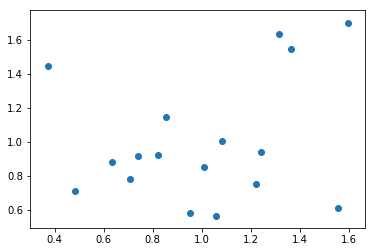

(0.24406264530715713, 0.34515397670774456)
nose


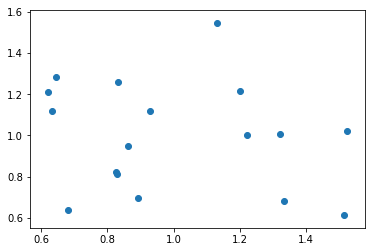

(-0.18470411223576103, 0.47789638466682727)
cheek


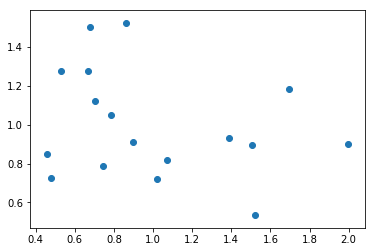

(-0.2611396264675605, 0.31134596998909225)
moustache


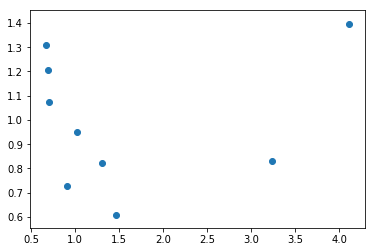

(0.18583054188295259, 0.63215485120564352)
beard


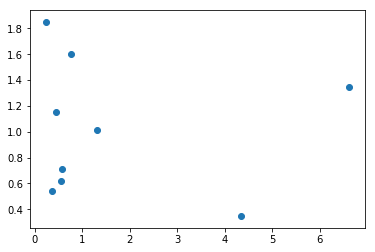

(-0.071414336397442227, 0.85513279867386771)
trial 11 #############################################
eye brows


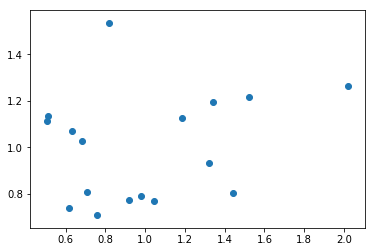

(0.22559416307400187, 0.38397160673628117)
eyes


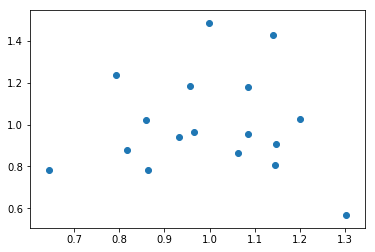

(-0.049440539705159721, 0.85053514127617247)
lips


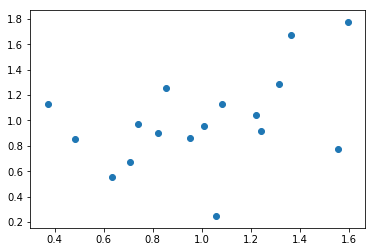

(0.41405114383547226, 0.098478388677896309)
nose


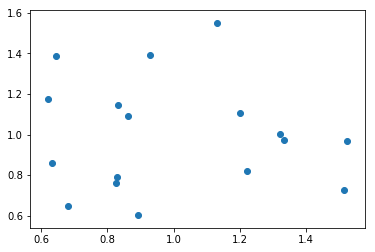

(-0.072998888034448622, 0.78068420026334084)
cheek


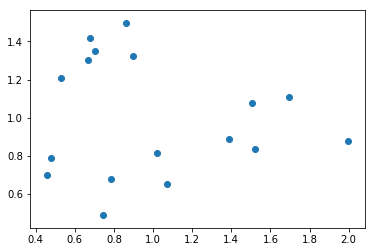

(-0.10322272896269076, 0.69340650233381096)
moustache


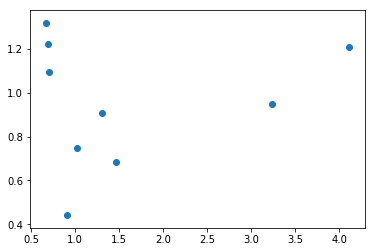

(0.15553195746523452, 0.6894707303936416)
beard


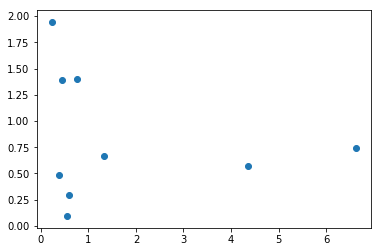

(-0.18338030185281878, 0.63673196877147631)


In [14]:
feature_cors = {}
feature_pvals = {}
for feature in features:
    feature_cors[feature] = []
    feature_pvals[feature] = []

bp_deviations = {}
for actor in test_set.keys():
    bp_deviations[actor]={}
    for feature in features:
        bp_deviations[actor][feature] = []

for _ in range(2,12):
    folder = 'saliency masks'
    fname = 'true_class_saliency_mask_trial{}_10.pkl'.format(_)
    with open(os.path.join(folder, fname), "rb") as handle:
        true_saliencies = _pickle.load(handle) 

    actor_true_saliencies = {}
    for actor in true_saliencies:
        if actor in bad_samples[_]:
            for index in bad_samples[_][actor]:
                true_saliencies[actor][index] = 0
            actor_saliency = np.sum(true_saliencies[actor], axis=0)/(15-len(bad_samples[_][actor]))
        else:
            actor_saliency = np.mean(true_saliencies[actor], axis=0)
        actor_true_saliencies[actor] = actor_saliency
    
    
    scores = {}
    deviations = {}
    for actor in test_set.keys():
        scores[actor] = {}
        deviations[actor] = {}
        for feature in features:
            scores[actor][feature] = score(feature, mc_rectangle_samples, actor_true_saliencies[actor])

    for feature in features:
        feature_scores = [scores[actor][feature] for actor in test_set.keys()]
        avg_feature_score = sum(feature_scores)/len(feature_scores)
        for actor in test_set.keys():
            deviations[actor][feature] = scores[actor][feature]/avg_feature_score
            bp_deviations[actor][feature].append(deviations[actor][feature])
    
    
    from scipy.stats import pearsonr
    
    print('trial {} #############################################'.format(_))
    
    

    
    for feature in features:
        if feature == 'moustache' or feature == 'beard':
            print(feature)
            turker_dev = np.array([turker_deviations[actor][feature] for actor in male_actors])
            bp_dev = np.array([deviations[actor][feature] for actor in male_actors])
            plt.scatter(turker_dev, bp_dev)
            plt.show()
            plt.close()
            cor, pval = pearsonr(turker_dev, bp_dev)
            print(pearsonr(turker_dev, bp_dev))
            feature_cors[feature].append(cor)
            feature_pvals[feature].append(pval)
            
        else:
            print(feature)
            turker_dev = np.array([turker_deviations[actor][feature] for actor in sorted(test_set.keys())])
            bp_dev = np.array([deviations[actor][feature] for actor in sorted(test_set.keys())])
            plt.scatter(turker_dev, bp_dev)
            plt.show()
            plt.close()
            cor, pval = pearsonr(turker_dev, bp_dev)
            print(pearsonr(turker_dev, bp_dev))
            feature_cors[feature].append(cor)
            feature_pvals[feature].append(pval)

In [15]:
feature_cors

{'beard': [0.18222984907798115,
  -0.061992817362418587,
  -0.024490346326192243,
  0.19776904677469848,
  -0.19541821569680792,
  -0.097357652442743886,
  -0.24332091240321632,
  0.44149149757291095,
  -0.071414336397442227,
  -0.18338030185281878],
 'cheek': [-0.051379638120131854,
  -0.25751085853175182,
  -0.18158787320349717,
  -0.12057462484634106,
  -0.19925500824880496,
  -0.318389039727621,
  -0.11807433173969675,
  -0.23748348978221154,
  -0.2611396264675605,
  -0.10322272896269076],
 'eye brows': [0.34396259303857579,
  0.46221413081176893,
  0.39872823696491555,
  0.55154752292206899,
  0.21683773806320492,
  0.34577241819022042,
  0.27441856649629776,
  0.57072525404855845,
  0.091740115680278858,
  0.22559416307400187],
 'eyes': [0.094327752081787369,
  -0.0047200035447041043,
  -0.044928633174014576,
  -0.14621025093856743,
  -0.092384499912027379,
  -0.060200745124200539,
  -0.11768986605196367,
  -0.22711583005146954,
  0.0021500098760073986,
  -0.049440539705159721],


In [16]:
for feature in feature_cors:
    print(feature, sum(feature_cors[feature])/len(feature_cors[feature]))

eye brows 0.348154073929
eyes -0.0646212606544
lips 0.352760417487
nose -0.0130227965467
cheek -0.184861721963
moustache 0.319597897814
beard -0.0055884189056


In [17]:
actors = sorted(test_set.keys())

In [18]:
for feature in features:
    print(feature)
    ranked_actors = sorted(turker_deviations.keys(), key=lambda x: turker_deviations[x][feature])
    ranked_actors.reverse()
    for actor in ranked_actors:
        print(actor, '- turker deviation: ', turker_deviations[actor][feature], \
              '- percentage' , actor_stats_normalized[actor][feature])
    print('#####################################################')

eye brows
Daniel Radcliffe - turker deviation:  2.0200400054112824 - percentage 0.23513870541611626
Steve Carell - turker deviation:  1.5219999731119025 - percentage 0.17716535433070865
Bill Hader - turker deviation:  1.439423378826044 - percentage 0.1675531914893617
Angie Harmon - turker deviation:  1.3406436162103732 - percentage 0.1560549313358302
Fran Drescher - turker deviation:  1.3216683527193958 - percentage 0.15384615384615385
Nicolas Cage - turker deviation:  1.1861353379968305 - percentage 0.1380697050938338
Alec Baldwin - turker deviation:  1.044682229639781 - percentage 0.12160413971539456
Anne Hathaway - turker deviation:  0.979944215894609 - percentage 0.11406844106463879
America Ferrera - turker deviation:  0.9162130048650767 - percentage 0.10664993726474278
Matt Damon - turker deviation:  0.8176272718230577 - percentage 0.09517426273458444
Jennifer Aniston - turker deviation:  0.7562779019687327 - percentage 0.08803301237964237
Lorraine Bracco - turker deviation:  0.70

In [20]:
avg_bp_deviations = {}
for actor in test_set.keys():
    avg_bp_deviations[actor] = {}
    for feature in features:
        temp = bp_deviations[actor][feature]
        avg_bp_deviations[actor][feature] = sum(temp)/len(temp)

In [21]:
for feature in features:
    print(feature)
    ranked_actors = sorted(avg_bp_deviations.keys(), key=lambda x: avg_bp_deviations[x][feature])
    ranked_actors.reverse()
    for actor in ranked_actors:
        print(actor, '- backprop deviation: ', avg_bp_deviations[actor][feature])
    print('#####################################################')

eye brows
Matt Damon - backprop deviation:  1.27066991654
Steve Carell - backprop deviation:  1.24230246744
Daniel Radcliffe - backprop deviation:  1.20357539606
Nicolas Cage - backprop deviation:  1.17284194376
Angie Harmon - backprop deviation:  1.17216161195
Fran Drescher - backprop deviation:  1.10375781585
Selena Gomez - backprop deviation:  1.06007017385
Lorraine Bracco - backprop deviation:  1.02916063427
Michael Vartan - backprop deviation:  1.01135093999
Kristin Chenoweth - backprop deviation:  0.99549373279
Cheryl Hines - backprop deviation:  0.973842841126
Anne Hathaway - backprop deviation:  0.931279682117
Alec Baldwin - backprop deviation:  0.868213007444
Bill Hader - backprop deviation:  0.83484170402
Jennifer Aniston - backprop deviation:  0.764329013219
America Ferrera - backprop deviation:  0.723547934618
Gerard Butler - backprop deviation:  0.642561184954
#####################################################
eyes
Daniel Radcliffe - backprop deviation:  1.32424187974
M

In [22]:
turker_deviations

{'Alec Baldwin': {'beard': 0.44655464686026985,
  'cheek': 0.7838840749189022,
  'eye brows': 1.044682229639781,
  'eyes': 1.1459838863518677,
  'lips': 0.8550145936530166,
  'moustache': 0.6906903513222664,
  'nose': 1.2020523906777658},
 'America Ferrera': {'beard': 0.03937341645066597,
  'cheek': 1.520558067534031,
  'eye brows': 0.9162130048650767,
  'eyes': 0.6459137510906419,
  'lips': 1.3146925439329136,
  'moustache': 0.426294683586721,
  'nose': 1.1296483995655322},
 'Angie Harmon': {'beard': 0.31341436116035737,
  'cheek': 1.3887661683942516,
  'eye brows': 1.3406436162103732,
  'eyes': 0.8596998190700242,
  'lips': 1.081720641820918,
  'moustache': 0.5453561200940877,
  'nose': 0.8285950579578321},
 'Anne Hathaway': {'beard': 0.15909055975250078,
  'cheek': 0.458500190993558,
  'eye brows': 0.979944215894609,
  'eyes': 1.0846137183556848,
  'lips': 1.5936273118091744,
  'moustache': 0.12303344661184742,
  'nose': 0.6217544995983799},
 'Bill Hader': {'beard': 0.37556584601147

In [23]:
avg_bp_deviations

{'Alec Baldwin': {'beard': 1.0072198957714062,
  'cheek': 1.0014435351196647,
  'eye brows': 0.86821300744356056,
  'eyes': 0.9376646440462405,
  'lips': 0.97533597363834112,
  'moustache': 0.98921449581729315,
  'nose': 1.0303279412338688},
 'America Ferrera': {'beard': 1.1188300156142656,
  'cheek': 0.72339081467732202,
  'eye brows': 0.72354793461770917,
  'eyes': 0.76998689883763916,
  'lips': 1.3607013400291827,
  'moustache': 1.5120422908224578,
  'nose': 1.6653116972036599},
 'Angie Harmon': {'beard': 0.68057210318957861,
  'cheek': 0.97480280761490601,
  'eye brows': 1.1721616119512674,
  'eyes': 1.0489432549823419,
  'lips': 0.86379704106596122,
  'moustache': 0.88867215658840437,
  'nose': 0.8728501886641773},
 'Anne Hathaway': {'beard': 1.7268755698094065,
  'cheek': 0.88045462388614482,
  'eye brows': 0.93127968211710177,
  'eyes': 0.98505155342582551,
  'lips': 1.7126319807075987,
  'moustache': 1.4531029442618828,
  'nose': 1.1078306125365009},
 'Bill Hader': {'beard': 0.

eye brows


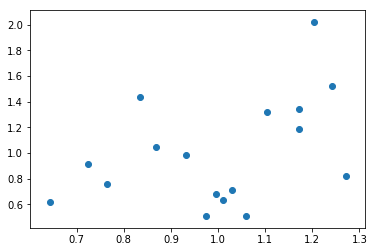

eyes


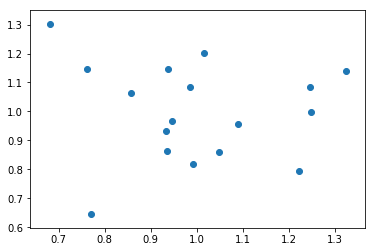

lips


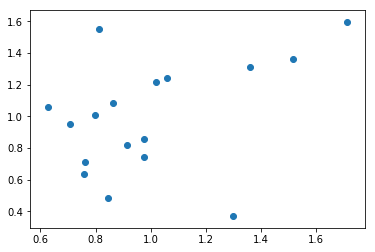

nose


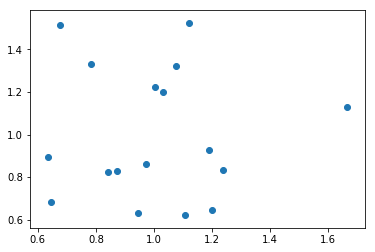

cheek


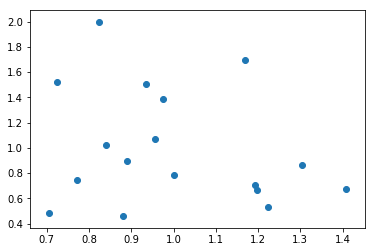

moustache


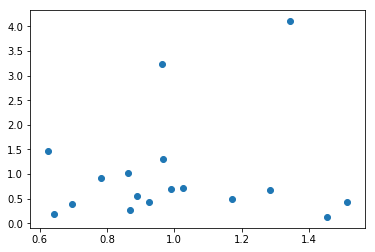

beard


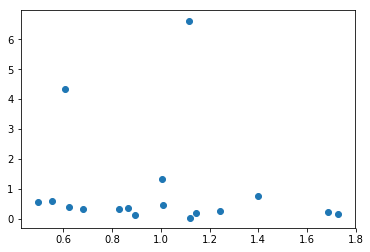

In [28]:
for feature in features:
    x = [avg_bp_deviations[actor][feature]for actor in test_set.keys()]
    y = [turker_deviations[actor][feature]for actor in test_set.keys()]
    print(feature)
    plt.scatter(x,y)
    plt.show()